In [1]:
import  VARmodel

In [2]:
import loadDataForSKtime

loader = loadDataForSKtime.PatientTimeSeriesLoader(
    "C:/Users/emily/Documents/DissertationProject/training/training_setA_csv", ['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = loader.load_data()
train_data, test_data = loader.split_train_test(df)


<class 'list'>
Patient 1: Dropping — constant columns found
Patient 5: Dropping — constant columns found
Patient 6: Dropping — constant columns found
Patient 11: Dropping — constant columns found
Patient 12: Dropping — constant columns found
Patient 13: Dropping — constant columns found
Patient 15: Dropping — constant columns found
Patient 17: Dropping — constant columns found
Patient 20: Dropping — constant columns found
Patient 22: Dropping — constant columns found
Patient 23: Dropping — constant columns found
Patient 24: Dropping — constant columns found
Patient 25: Dropping — constant columns found
Patient 26: Less than 15 time points — skipping.
Patient 27: Less than 15 time points — skipping.
Patient 32: Dropping — constant columns found
Patient 33: Dropping — constant columns found
Patient 34: Less than 15 time points — skipping.
Patient 36: Dropping — constant columns found
Patient 39: Dropping — constant columns found
Patient 40: Dropping — constant columns found
Patient 41: D

In [9]:
train_data.index

MultiIndex([(    2,  0),
            (    2,  1),
            (    2,  2),
            (    2,  3),
            (    2,  4),
            (    2,  5),
            (    2,  6),
            (    2,  7),
            (    2,  8),
            (    2,  9),
            ...
            (20336, 17),
            (20336, 18),
            (20336, 19),
            (20336, 20),
            (20336, 21),
            (20336, 22),
            (20336, 23),
            (20336, 24),
            (20336, 25),
            (20336, 26)],
           names=['Patient_ID', 'ICULOS'], length=423769)

In [10]:
test_data.index

MultiIndex([(    2, 17),
            (    2, 18),
            (    2, 19),
            (    2, 20),
            (    2, 21),
            (    2, 22),
            (    3, 42),
            (    3, 43),
            (    3, 44),
            (    3, 45),
            ...
            (20335, 38),
            (20335, 39),
            (20335, 40),
            (20335, 41),
            (20336, 27),
            (20336, 28),
            (20336, 29),
            (20336, 30),
            (20336, 31),
            (20336, 32)],
           names=['Patient_ID', 'ICULOS'], length=68874)

In [21]:
patient_ids = train_data.index.get_level_values("Patient_ID").unique()
patient_ids[84]

159

In [3]:
VARforecaster = VARmodel.VARForecaster(train_data, test_data, ['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])

In [4]:
VARforecaster.fit()
VARforecasts = VARforecaster.predict(steps=6)

In [9]:
VARforecasts

HR       O2Sat          SBP         MAP  \
Patient_ID ICULOS                                                    
2          17      171.176837  108.968097   485.274444  240.446727   
           18      -60.769534   85.888411  -274.308747 -126.147436   
           19      223.394492  115.845614   677.275379  332.817162   
           20     -147.285577   72.612998  -580.352054 -261.181618   
           21      350.995182  129.160896  1114.002942  533.330476   
...                       ...         ...          ...         ...   
998        49       79.814443   82.704153    89.531360   57.695563   
           50       78.691004   81.610715    89.668809   58.285871   
           51       77.573834   81.447252    90.401181   58.767911   
           52       76.377340   81.682248    91.127006   59.262665   
           53       75.154524   82.126152    91.748352   59.647475   

                          DBP       Resp        Temp  
Patient_ID ICULOS                                     
2          17      176.525205  10.403367  218.709099  
           18     -105.634545  40.368749 -285.258646  
           19      238.638055 -20.859384  338.771774  
           20     -215.904498  51.846553 -418.180344  
           21      399.088868 -37.730565  602.315964  
...                       ...        ...         ...  
998        49       46.693496  20.636950   23.778256  
           50       46.741277  18.786619   21.587301  
           51       46.855188  17.456580   20.641234  
           52       46.809410  16.481288   20.220641  
           53       46.578340  15.772246   20.166231  

[3462 rows x 7 columns]

In [5]:
VARforecaster.evaluate_model(VARforecasts)

Mean Absolute Error: 1596178199.5931613


In [7]:
from sktime.performance_metrics.forecasting import mean_absolute_error

mae = mean_absolute_error(test_data, VARforecasts)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1596178199.5931613


In [8]:
import numpy as np
from sktime.performance_metrics.forecasting import mean_squared_error

ignore_nan = test_data[(test_data != -1).all(axis=1)]
filtered_forecast = VARforecasts.loc[ignore_nan.index]
patient_ids = test_data.index.get_level_values("Patient_ID").unique()
mae_scores = []

for pid in patient_ids:
    try:
# Calculate error metrics
mae = mean_absolute_error(ignore_nan, filtered_forecast)
mse = mean_squared_error(ignore_nan, filtered_forecast)
rmse = np.sqrt(mse)

# Calculate MAPE (Mean Absolute Percentage Error) for accuracy
mape = np.mean(np.abs((ignore_nan - filtered_forecast) / ignore_nan)) * 100
accuracy = 100 - mape  # Accuracy derived from MAPE

# Print results
print(f"Model Evaluation Results:\n"
      f"  - Mean Absolute Error (MAE): {mae:.4f}\n"
      f"  - Mean Squared Error (MSE): {mse:.4f}\n"
      f"  - Root Mean Squared Error (RMSE): {rmse:.4f}\n"
      f"  - Mean Absolute Percentage Error (MAPE): {mape:.2f}%\n"
      f"  - Forecasting Accuracy: {accuracy:.2f}%")


Model Evaluation Results:
  - Mean Absolute Error (MAE): 1820445.1595
  - Mean Squared Error (MSE): 80476361139090288.0000
  - Root Mean Squared Error (RMSE): 283683558.1050
  - Mean Absolute Percentage Error (MAPE): 3119447.92%
  - Forecasting Accuracy: -3119347.92%


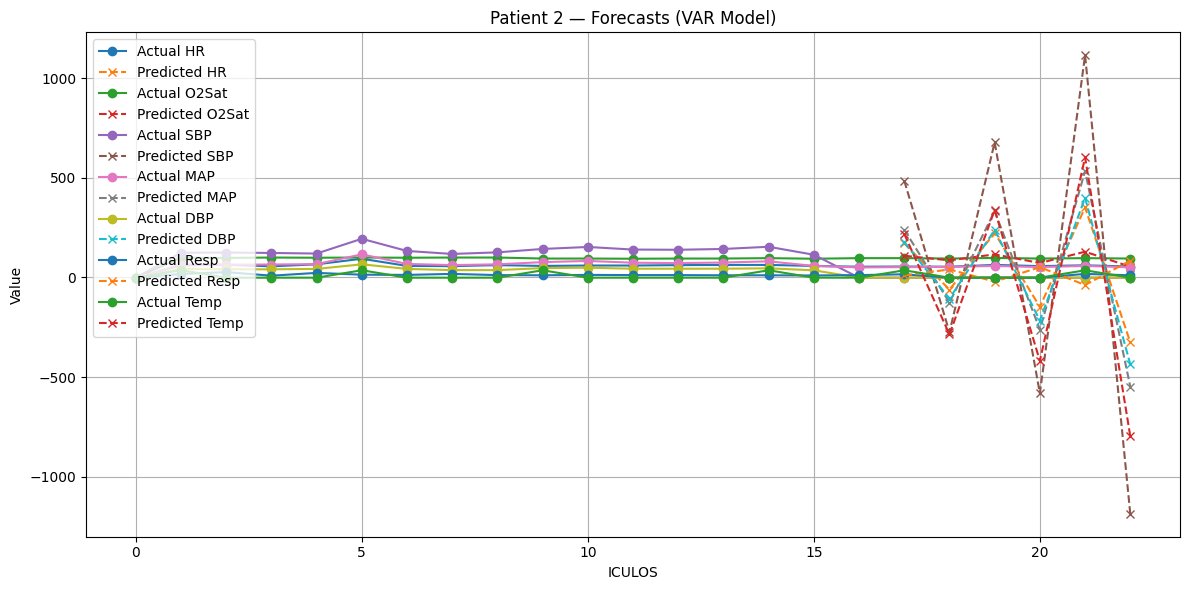

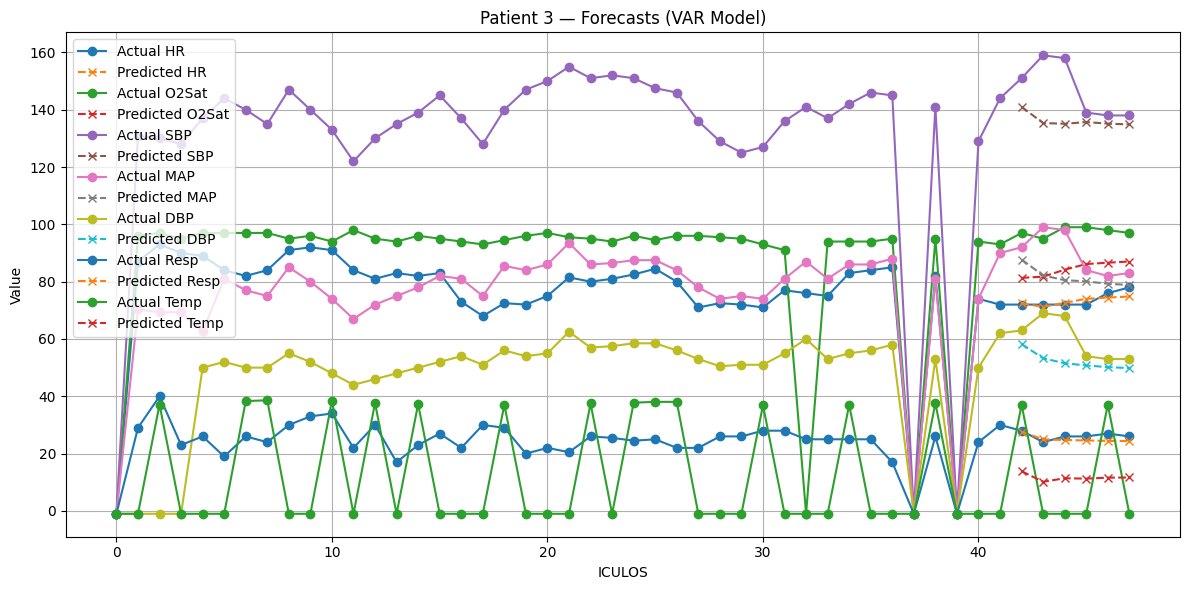

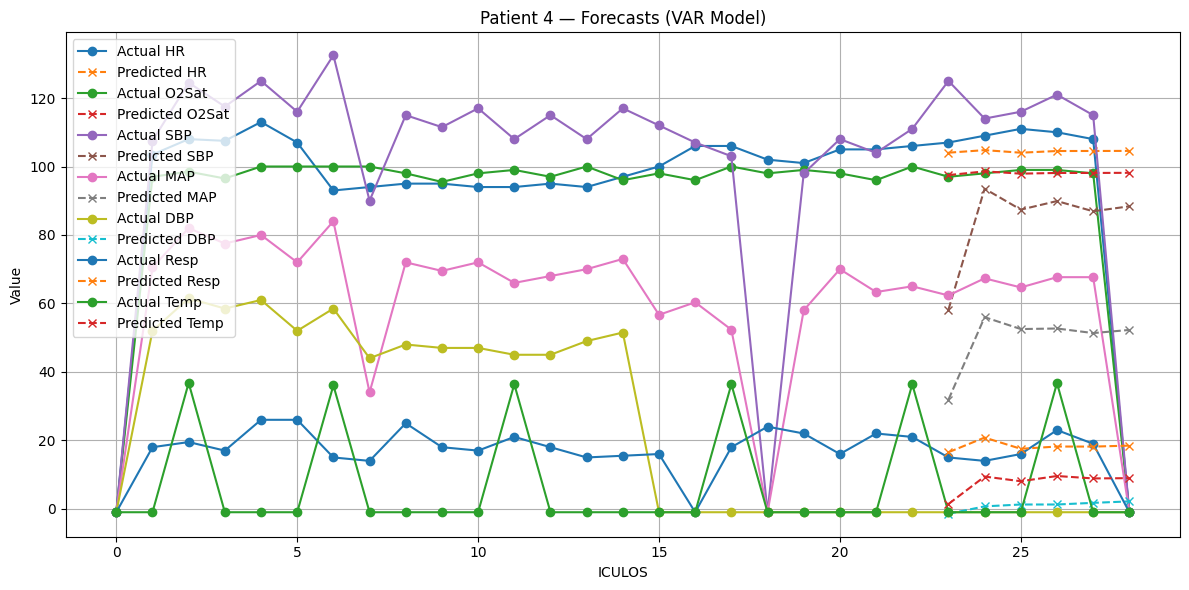

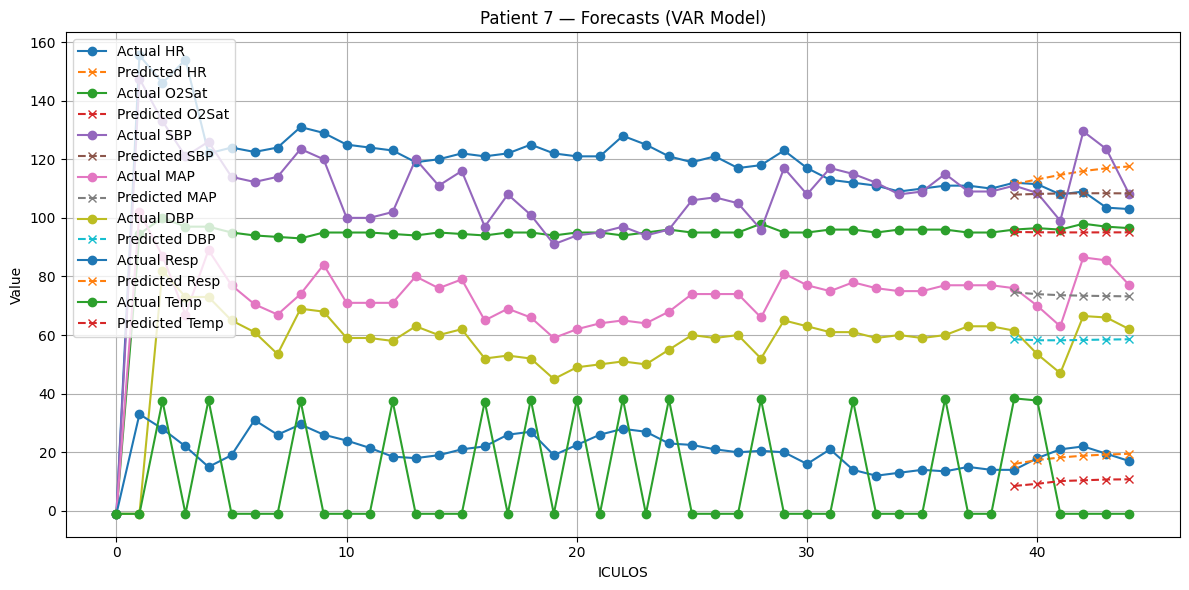

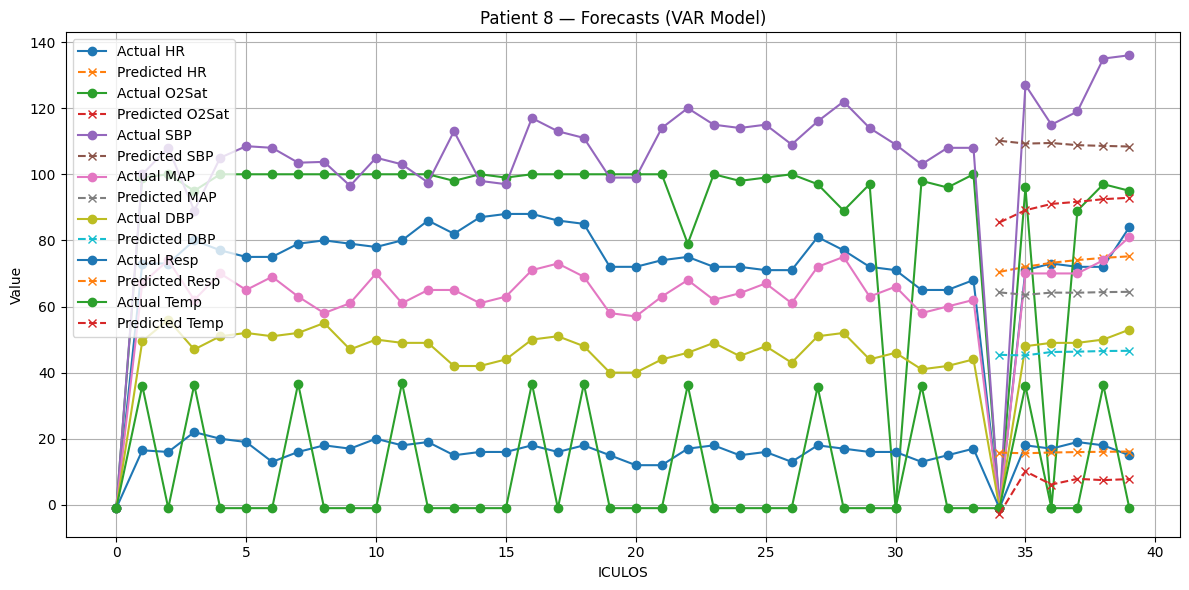

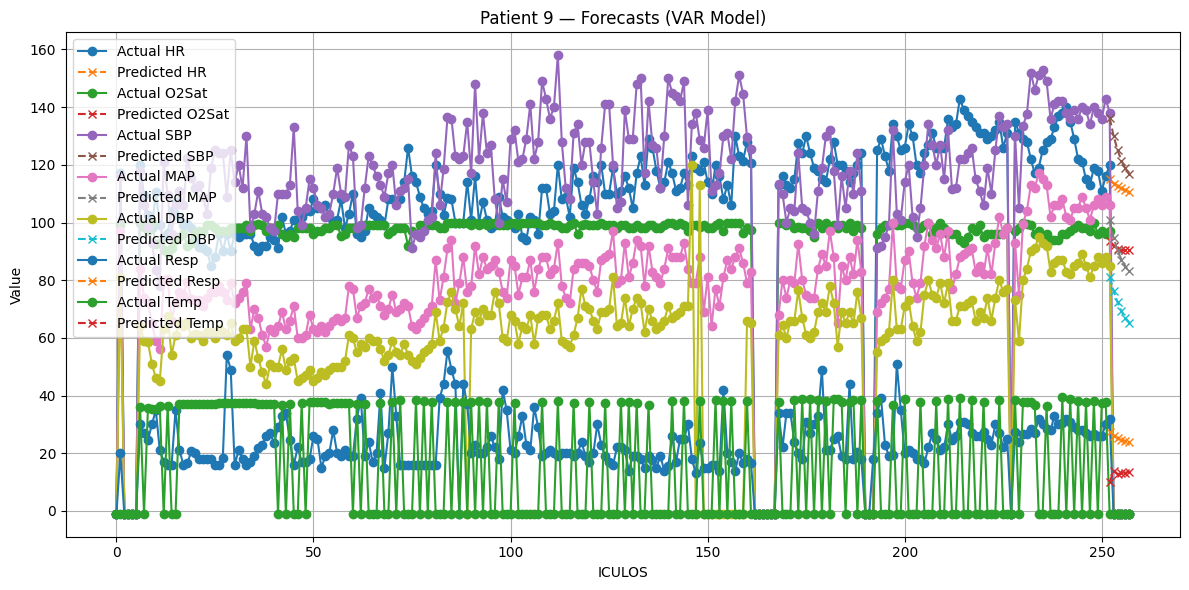

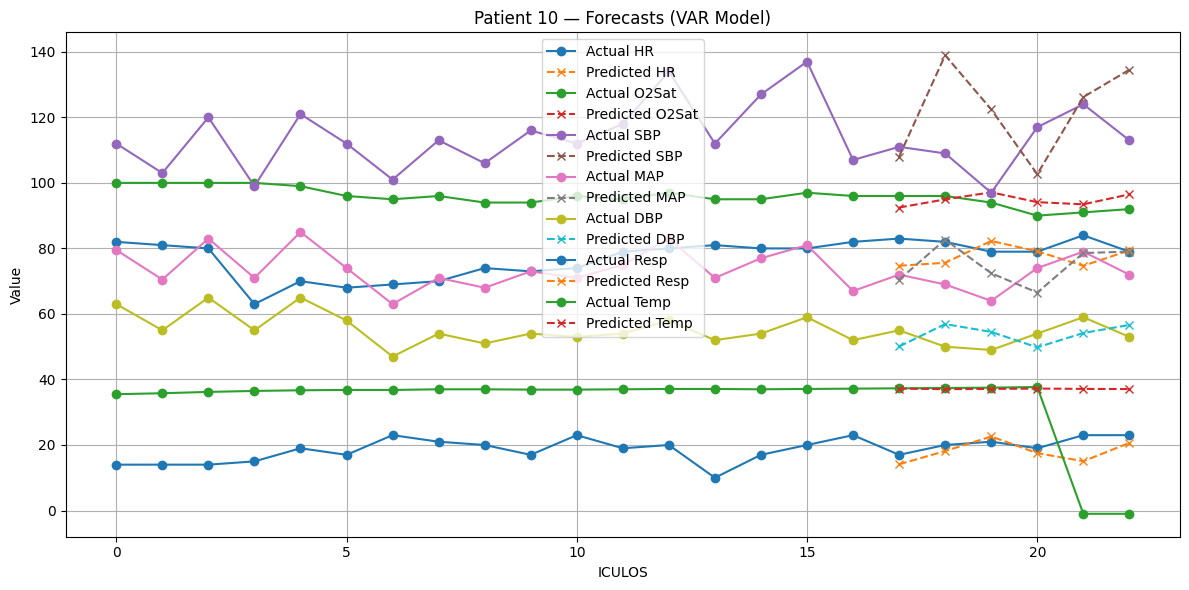

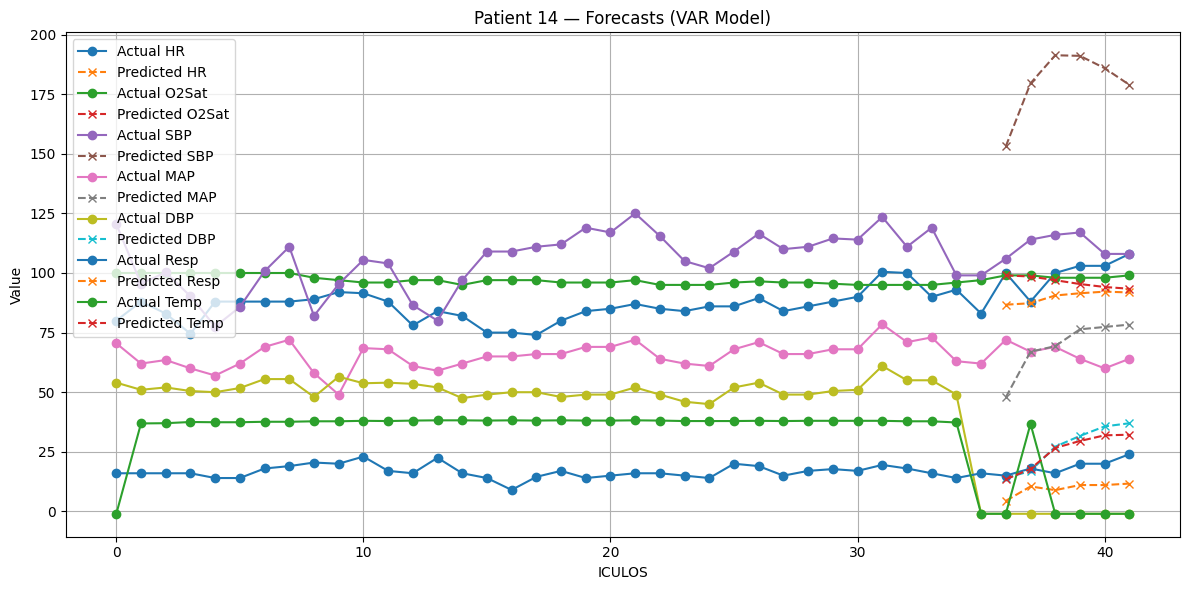

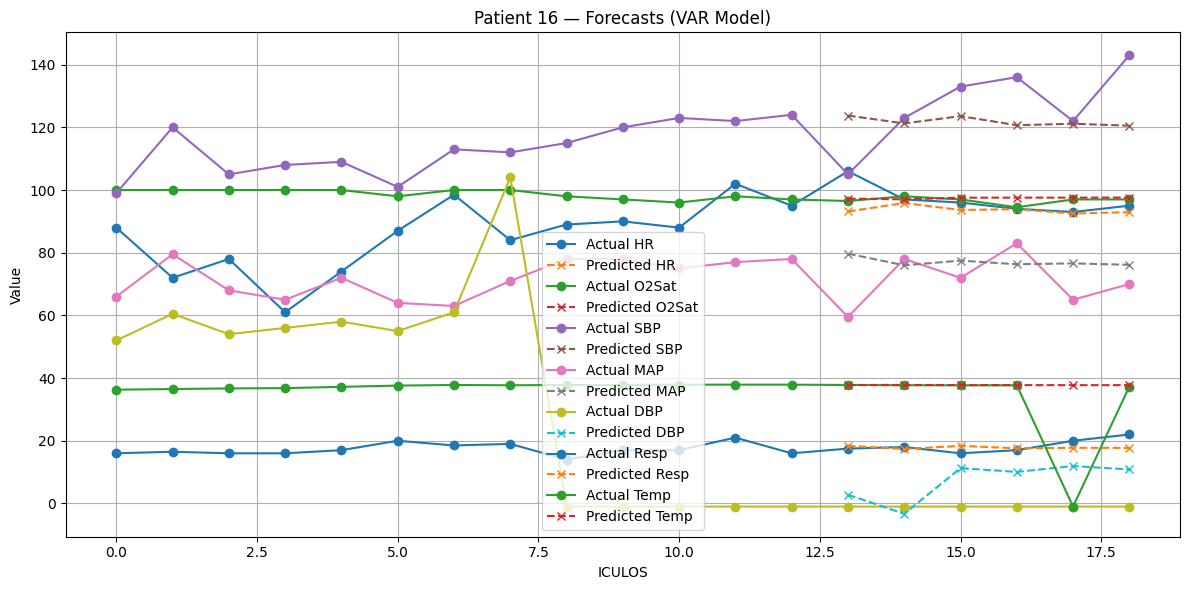

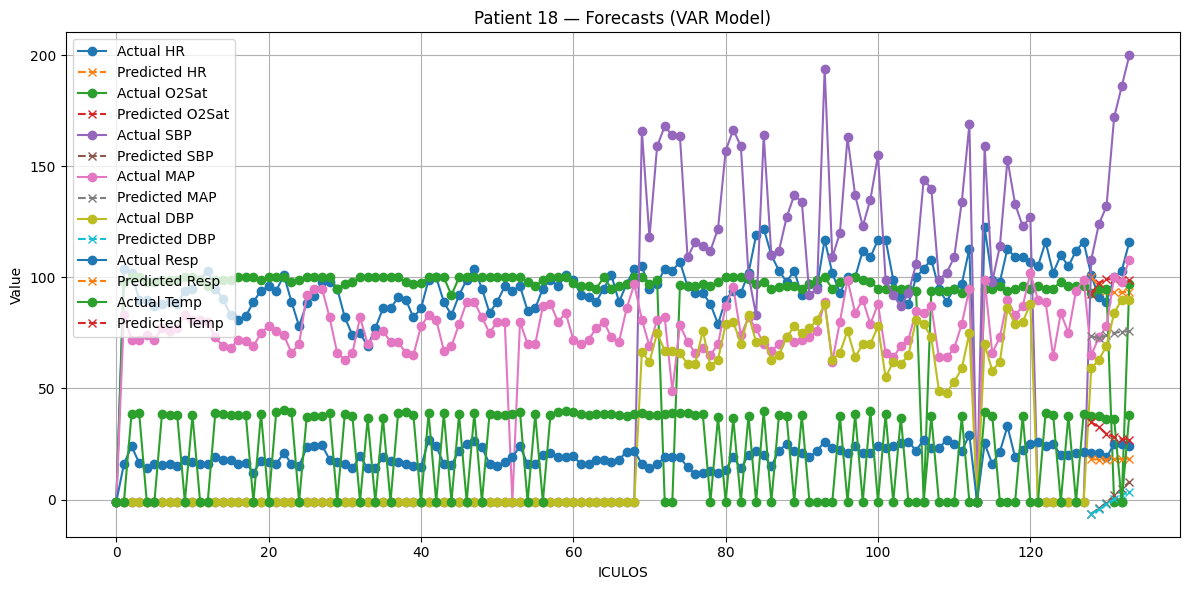

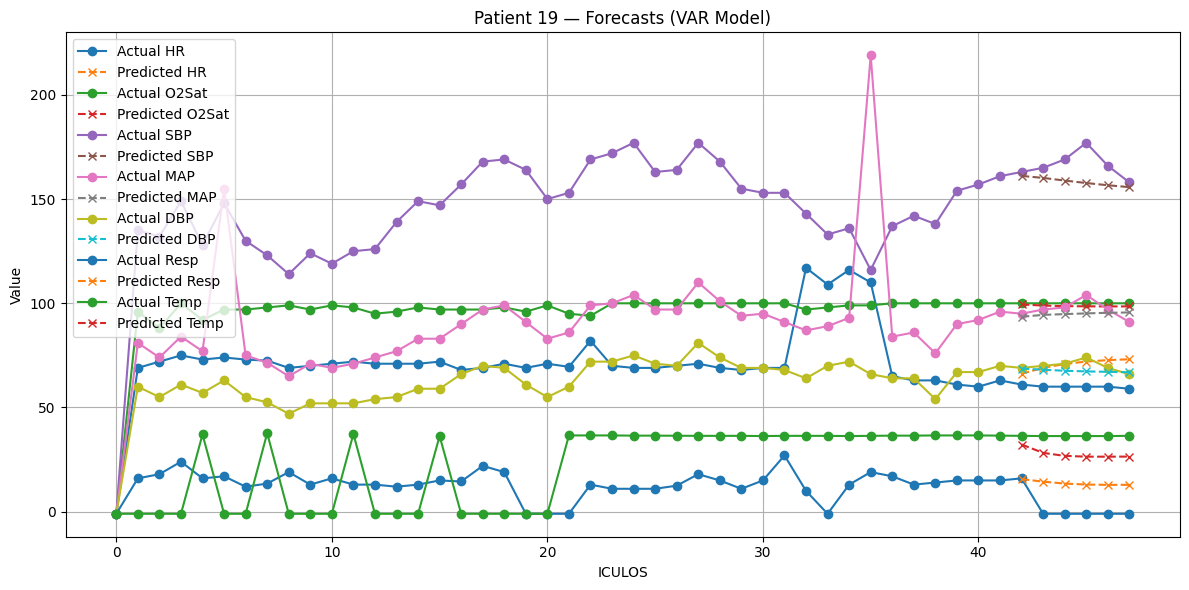

In [10]:
for patient_id in range(1, 20):
    if patient_id in VARforecasts.index.get_level_values("Patient_ID"):
        VARforecaster.plot_forecast(VARforecasts, patient_id)